#IMPORTING LIBRARIES AND LOAD DATASET

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
!pip uninstall -y numpy
!pip install numpy==1.23.5


Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.4 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.4.33 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.1.1 requires numpy>=1.25.0, but you have numpy 1.23.

In [2]:
import numpy as np
print(np.__version__)


1.23.5


In [3]:
df1 = pd.read_csv('/content/Reddit_Data.csv')
df2 = pd.read_csv('/content/Twitter_Data.csv')

In [4]:
df1

clean_comment  category
0       family mormon have never tried explain them t...         1
1      buddhism has very much lot compatible with chr...         1
2      seriously don say thing first all they won get...        -1
3      what you have learned yours and only yours wha...         0
4      for your own benefit you may want read living ...         1
...                                                  ...       ...
37244                                              jesus         0
37245  kya bhai pure saal chutiya banaya modi aur jab...         1
37246              downvote karna tha par upvote hogaya          0
37247                                         haha nice          1
37248             facebook itself now working bjp’ cell          0

[37249 rows x 2 columns]

In [5]:
df2

clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]

In [6]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [7]:
#renaming the columns
df2.columns=['messages','labels']
df1.columns=['messages','labels']

In [8]:
df2.head()

messages  labels
0  when modi promised “minimum government maximum...    -1.0
1  talk all the nonsense and continue all the dra...     0.0
2  what did just say vote for modi  welcome bjp t...     1.0
3  asking his supporters prefix chowkidar their n...     1.0
4  answer who among these the most powerful world...     1.0

In [9]:
df1.head()

messages  labels
0   family mormon have never tried explain them t...       1
1  buddhism has very much lot compatible with chr...       1
2  seriously don say thing first all they won get...      -1
3  what you have learned yours and only yours wha...       0
4  for your own benefit you may want read living ...       1

#Merge Data

In [10]:
data = pd.concat([df1, df2], ignore_index = True)
data

messages  labels
0        family mormon have never tried explain them t...     1.0
1       buddhism has very much lot compatible with chr...     1.0
2       seriously don say thing first all they won get...    -1.0
3       what you have learned yours and only yours wha...     0.0
4       for your own benefit you may want read living ...     1.0
...                                                   ...     ...
200224  why these 456 crores paid neerav modi not reco...    -1.0
200225  dear rss terrorist payal gawar what about modi...    -1.0
200226  did you cover her interaction forum where she ...     0.0
200227  there big project came into india modi dream p...     0.0
200228  have you ever listen about like gurukul where ...     1.0

[200229 rows x 2 columns]

In [11]:
data.tail()

messages  labels
200224  why these 456 crores paid neerav modi not reco...    -1.0
200225  dear rss terrorist payal gawar what about modi...    -1.0
200226  did you cover her interaction forum where she ...     0.0
200227  there big project came into india modi dream p...     0.0
200228  have you ever listen about like gurukul where ...     1.0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   messages  200125 non-null  object 
 1   labels    200222 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


#Handling Missing Values

In [13]:
data.isnull().sum()

messages    104
labels        7
dtype: int64

In [14]:
data = data.dropna()

In [15]:

data.head()

messages  labels
0   family mormon have never tried explain them t...     1.0
1  buddhism has very much lot compatible with chr...     1.0
2  seriously don say thing first all they won get...    -1.0
3  what you have learned yours and only yours wha...     0.0
4  for your own benefit you may want read living ...     1.0

In [16]:
data.tail()

messages  labels
200224  why these 456 crores paid neerav modi not reco...    -1.0
200225  dear rss terrorist payal gawar what about modi...    -1.0
200226  did you cover her interaction forum where she ...     0.0
200227  there big project came into india modi dream p...     0.0
200228  have you ever listen about like gurukul where ...     1.0

#Data Preprocessing

In [20]:
import re, string, nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer


In [21]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Function to replace URLs with the string "URL"
def replace_url(text):
    return re.sub(r'https?:\/\/\S*|www\.\S+', 'URL', text)

# Function to remove HTML tags from the text
def remove_html(text):
    return re.sub(r'<.*?>', '', text)

# Function to replace mentions (@username) with the string "user"
def replace_mentions(text):
    return re.sub(r'@\S*', 'user', text, flags=re.IGNORECASE)

# Function to replace numbers with the string "NUMBER"
def replace_num(text):
    return re.sub(r'^[+-]*?\d{1,3}[- ]*?\d{1,10}|\d{10}', 'NUMBER', text)

# Function to replace "<3" with the string "HEART"
def replace_heart(text):
    return re.sub(r'<3', 'HEART', text)

# Function to remove alphanumeric words (e.g., "XYZ123ABC")
def remove_alphanumeric(text):
    return re.sub(r'\w*\d+\w*', '', text)

# Function to remove English stopwords from the text
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))  # Load stopwords
    return ' '.join([word for word in text.split() if word not in stop_words])

# Function to remove punctuation from the text
def remove_punctuations(text):
    return ''.join([char for char in text if char not in string.punctuation])

# Function to lemmatize words (reduce them to their root form)
def lemmatization(text):
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])


In [22]:
def clean_text(text):
    text = str(text).lower()  # Convert text to lowercase
    text = replace_url(text)  # Replace URLs
    text = remove_html(text)  # Remove HTML tags
    text = replace_mentions(text)  # Replace mentions (@username) with "user"
    text = replace_num(text)  # Replace numbers with "NUMBER"
    text = replace_heart(text)  # Replace "<3" with "HEART"
    text = remove_alphanumeric(text)  # Remove alphanumeric words (e.g., "XYZ123ABC")
    text = remove_stopwords(text)  # Remove stopwords
    text = remove_punctuations(text)  # Remove punctuation
    # text = stemming(text)  # Uncomment if stemming is needed
    text = lemmatization(text)  # Apply lemmatization
    return text  # Return the cleaned text


In [23]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')


stop_words = stopwords.words('english')

print(stop_words[:10])


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words[:10])
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words[:10])
import nltk
nltk.data.path.append('/root/nltk_data')
import nltk
nltk.download('all')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_ta

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package book_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package book_grammars is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package city_database to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package city_database is already up

True

In [25]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatization(text):
    lm = WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text

data['messages1'] = data['messages'].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-25-fa2ab54e9cf4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages1'] = data['messages'].apply(clean_text)


In [26]:
data['messages1']

0         family mormon never try explain still stare pu...
1         buddhism much lot compatible christianity espe...
2         seriously say thing first get complex explain ...
3         learn want teach different focus goal wrap pap...
4         benefit may want read live buddha live christ ...
                                ...                        
200224    crores pay neerav modi recover congress leader...
200225    dear rss terrorist payal gawar modi kill plus ...
200226                        cover interaction forum leave
200227    big project come india modi dream project happ...
200228    ever listen like gurukul discipline maintain e...
Name: messages1, Length: 200118, dtype: object

#Sentiment Analysis

In [27]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [28]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    # Get sentiment scores using VADER
    scores = sid.polarity_scores(text)
    # Extract compound score, which represents overall sentiment
    compound_score = scores['compound']
    # Return compound score
    return compound_score

# Apply sentiment analysis to the cleaned text data
data['sentiment_score'] = data['messages1'].apply(get_sentiment_scores)

<ipython-input-28-28a27091f096>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_score'] = data['messages1'].apply(get_sentiment_scores)


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200118 entries, 0 to 200228
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   messages         200118 non-null  object 
 1   labels           200118 non-null  float64
 2   messages1        200118 non-null  object 
 3   sentiment_score  200118 non-null  float64
dtypes: float64(2), object(2)
memory usage: 7.6+ MB


In [30]:
data.drop('messages', axis=1, inplace=True)

<ipython-input-30-27544148e1fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('messages', axis=1, inplace=True)


In [31]:
data.head()

labels                                          messages1  sentiment_score
0     1.0  family mormon never try explain still stare pu...           0.9423
1     1.0  buddhism much lot compatible christianity espe...           0.9831
2    -1.0  seriously say thing first get complex explain ...           0.7430
3     0.0  learn want teach different focus goal wrap pap...           0.0772
4     1.0  benefit may want read live buddha live christ ...           0.9393

#EDA & Data Visualisation

<Axes: xlabel='labels'>

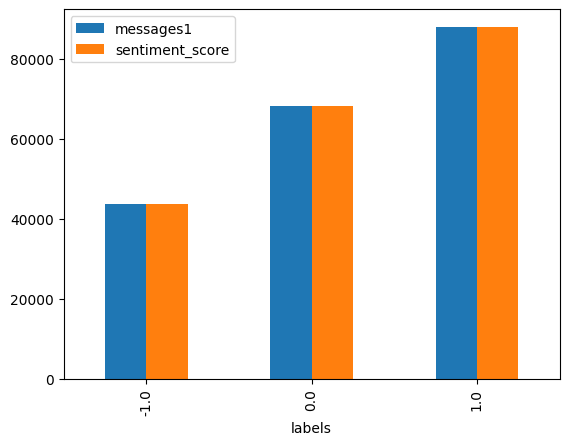

In [32]:
 #The distribution of sentiments
data.groupby('labels').count().plot(kind='bar')

In [33]:
data['label'] = data['labels'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

<ipython-input-33-95b0dc3750cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['labels'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})


<ipython-input-34-8e689c2e3494>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data.messages1.str.split().apply(len)


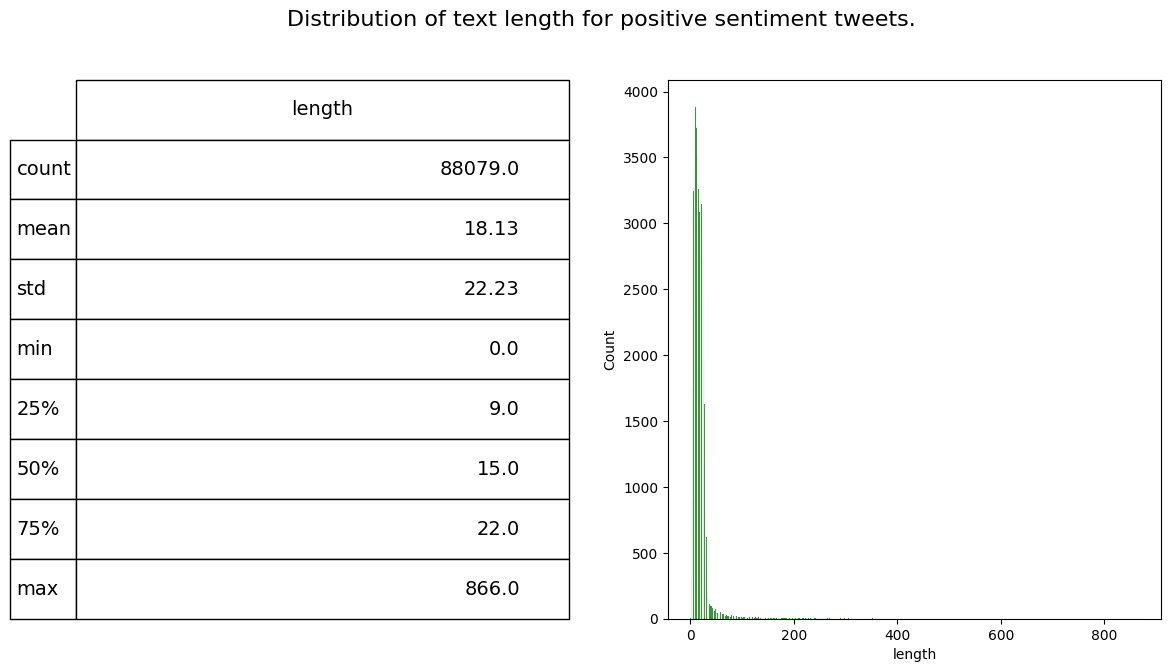

In [34]:
#Plotting the distribution of text length for positive sentiment Data
fig = plt.figure(figsize=(14,7))
data['length'] = data.messages1.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']=='Positive']['length'], ax=ax1,color='green')
describe = data.length[data.label=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

<ipython-input-35-69b0d5e43d45>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data.messages1.str.split().apply(len)
<ipython-input-35-69b0d5e43d45>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stats_text = "\n".join([f"{index}: {value[0]}" for index, value in describe.iterrows()])


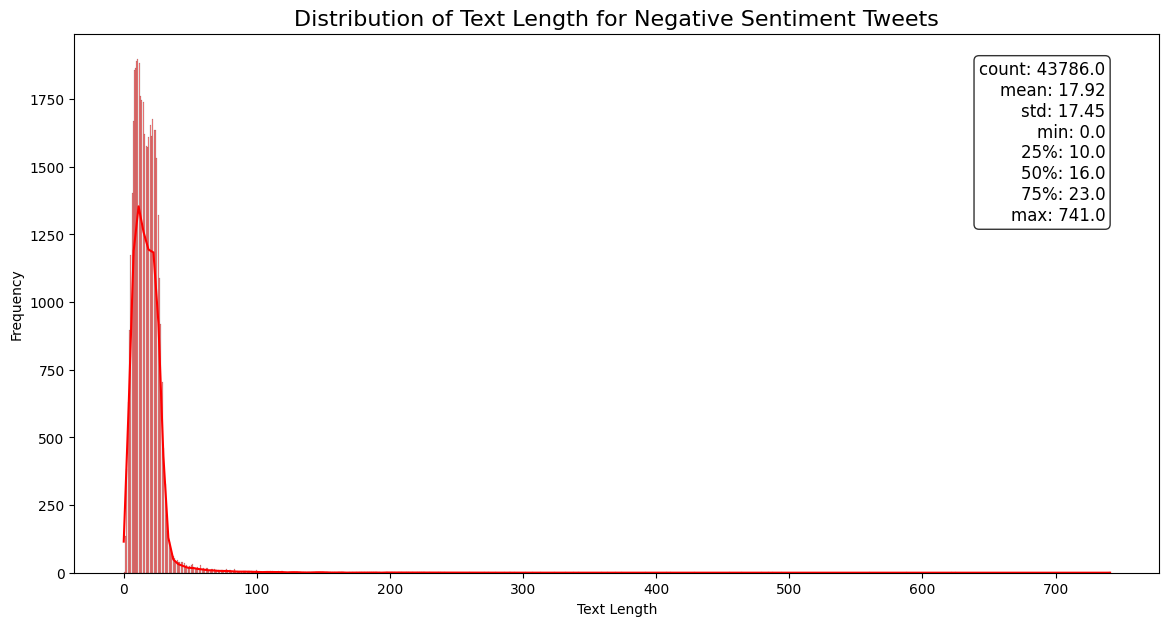

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

data['length'] = data.messages1.str.split().apply(len)
sns.histplot(data[data['label'] == 'Negative']['length'], ax=ax, color='red', kde=True)

describe = data.length[data.label == 'Negative'].describe().to_frame().round(2)
stats_text = "\n".join([f"{index}: {value[0]}" for index, value in describe.iterrows()])
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax.text(
    0.95, 0.95, stats_text,
    transform=ax.transAxes,
    fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props
)

ax.set_title('Distribution of Text Length for Negative Sentiment Tweets', fontsize=16)
ax.set_xlabel('Text Length')
ax.set_ylabel('Frequency')

plt.show()

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(14, 7))

data['length'] = data.messages1.str.split().apply(len)
sns.histplot(data[data['label'] == 'Neutral']['length'], ax=ax, color='blue', kde=True)

describe = data.length[data.label == 'Neutral'].describe().to_frame().round(2)
stats_text = "\n".join([f"{index}: {value[0]}" for index, value in describe.iterrows()])
props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax.text(
    0.95, 0.95, stats_text,
    transform=ax.transAxes,
    fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=props
)

ax.set_title('Distribution of Text Length for Neutral Sentiment Tweets', fontsize=16)
ax.set_xlabel('Text Length')
ax.set_ylabel('Frequency')

plt.show()

<ipython-input-36-f54f05be22b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data.messages1.str.split().apply(len)
<ipython-input-36-f54f05be22b3>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stats_text = "\n".join([f"{index}: {value[0]}" for index, value in describe.iterrows()])


In [37]:
import plotly.express as px
fig = px.pie(data, names='label', title ='Pie chart of different sentiments of data')
fig.show()

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200118 entries, 0 to 200228
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   labels           200118 non-null  float64
 1   messages1        200118 non-null  object 
 2   sentiment_score  200118 non-null  float64
 3   label            200118 non-null  object 
 4   length           200118 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 9.2+ MB


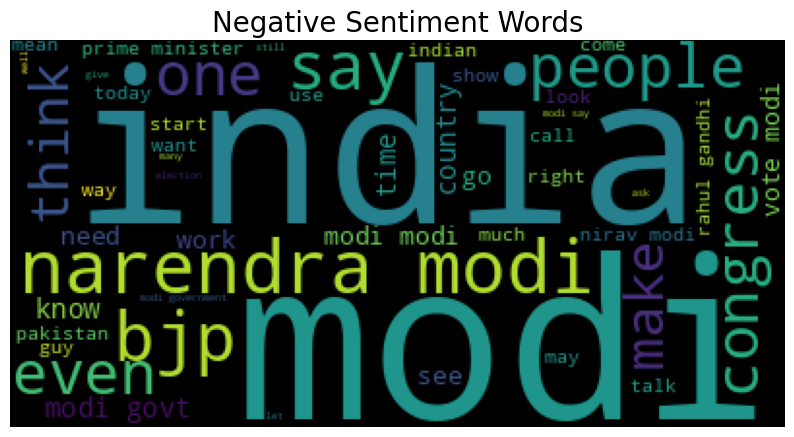

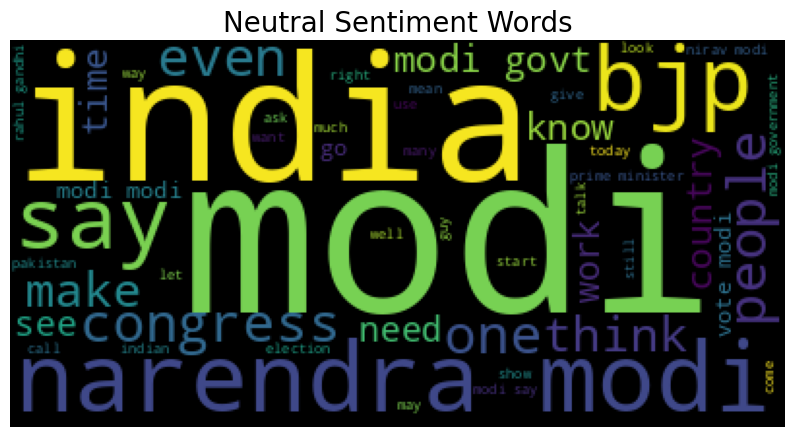

In [39]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def wordcount_gen(df, category, sentiment_column='sentiment_score'):
              """
              Generating Word Cloud

              Inputs:
                - df: DataFrame containing the data
                - category: Positive/Negative/Neutral
                - sentiment_column (optional): Name of the column containing sentiment score (default: 'sentiment_score')
              """

              # Filter data based on sentiment
              filtered_data = df[df[sentiment_column] > 0.5] if category == 'Positive' else df[df[sentiment_column] <= 0.5]

              # Combine all messages from the filtered data
              combined_tweets = " ".join(filtered_data['messages1'])

              # Initialize wordcloud object
              wc = WordCloud(background_color='black',
                              max_words=50,
                              stopwords=STOPWORDS)

              # Generate and plot wordcloud
              plt.figure(figsize=(10, 10))
              plt.imshow(wc.generate(combined_tweets))
              plt.title('{} Sentiment Words'.format(category), fontsize=20)
              plt.axis('off')
              plt.show()
#Positive tweet words
wordcount_gen(data, 'Positive')

# Negative tweet words
wordcount_gen(data, 'Negative')

# Neutral tweet words (assuming sentiment_column < 0.5 is neutral)
wordcount_gen(data, 'Neutral')

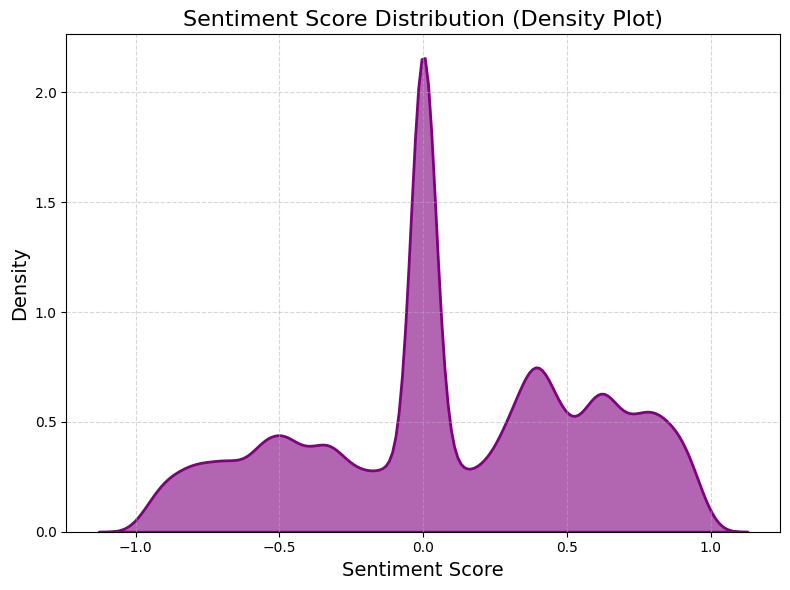

In [40]:
# Visualize sentiment distribution using a density plot
plt.figure(figsize=(8, 6))

sns.kdeplot(
    data['sentiment_score'],
    fill=True,
    color='purple',
    alpha=0.6,
    linewidth=2
)

plt.title('Sentiment Score Distribution (Density Plot)', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

<ipython-input-41-f76c39074626>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




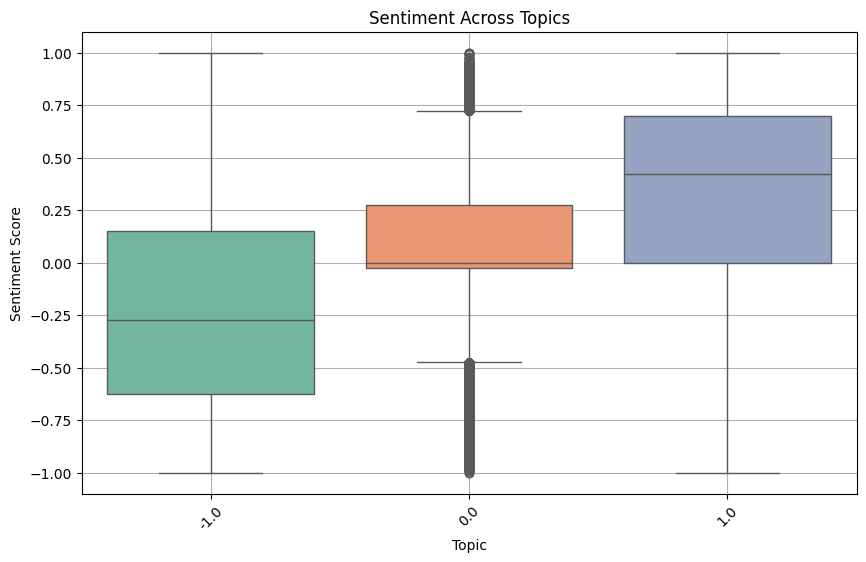

In [41]:
# Compare sentiment across labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='labels', y='sentiment_score', data=data, palette='Set2')
plt.title('Sentiment Across Topics')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

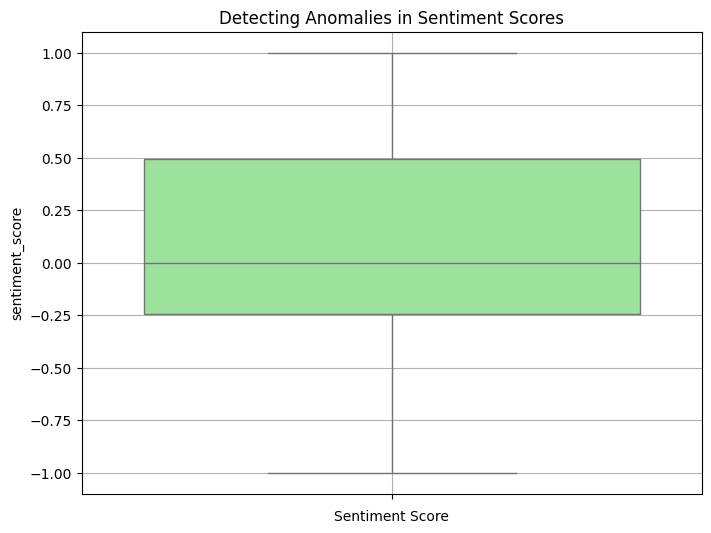

In [42]:
# Detect anomalies or outliers in sentiment scores
plt.figure(figsize=(8, 6))
sns.boxplot(data['sentiment_score'], color='lightgreen')
plt.title('Detecting Anomalies in Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.grid(True)
plt.show()

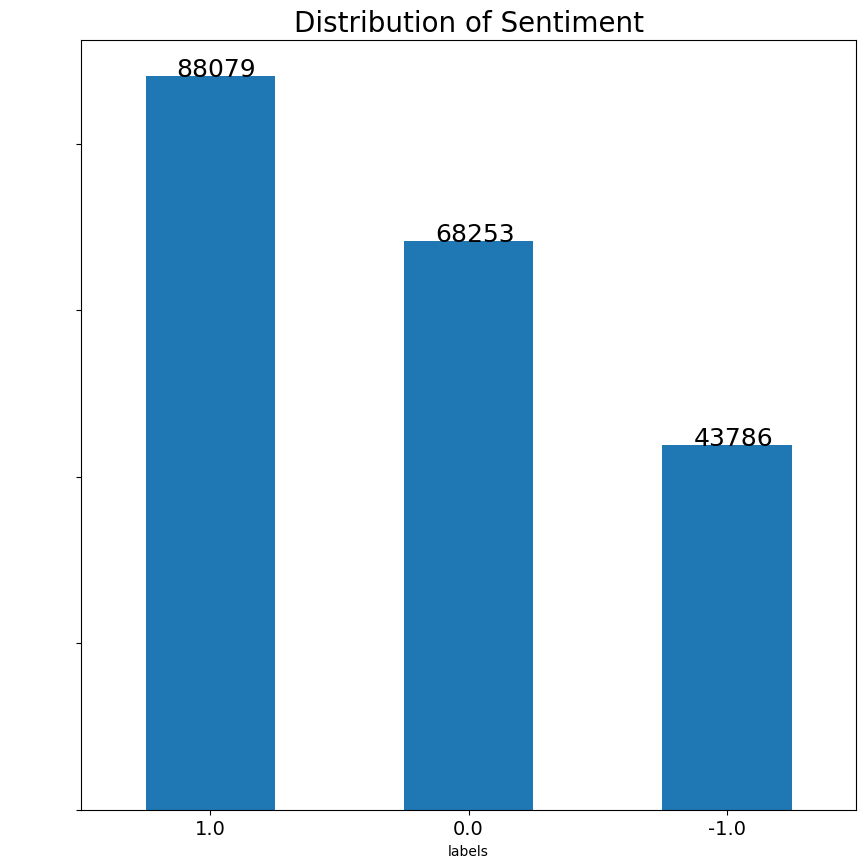

In [43]:
#Graph of Stopwords
fig , ax = plt.subplots(figsize = (10,10))
ax = data['labels'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 0, size = 14)
plt.yticks(size = 14, color = 'white')
plt.title('Distribution of Sentiment', size = 20)

ax.annotate(text = data['labels'].value_counts().values[0], xy = (-0.13,88079), size = 18)
ax.annotate(text = data['labels'].value_counts().values[1], xy = (0.87,68253), size = 18)
ax.annotate(text = data['labels'].value_counts().values[2], xy = (1.87,43786), size = 18)

plt.show()

#Train & Test Split

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data = data.copy()
data['messages1'] = data['messages1'].fillna('')


X = data['messages1']
y = data['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)


X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


#Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize logistic regression model with improvements
log_reg_model = LogisticRegression(solver='liblinear', max_iter=500, class_weight='balanced')

# Train the model
log_reg_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.8296

Confusion Matrix:
 [[3334  548  497]
 [ 221 6343  261]
 [ 619 1265 6924]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.80      0.76      0.78      4379
     Neutral       0.78      0.93      0.85      6825
    Positive       0.90      0.79      0.84      8808

    accuracy                           0.83     20012
   macro avg       0.83      0.83      0.82     20012
weighted avg       0.84      0.83      0.83     20012



In [46]:
pip install --upgrade numpy==1.23.5 scipy==1.13.0 gensim==4.3.3 pytensor==2.27.1


In [57]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=6, n_classes=3, random_state=42)


In [58]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)


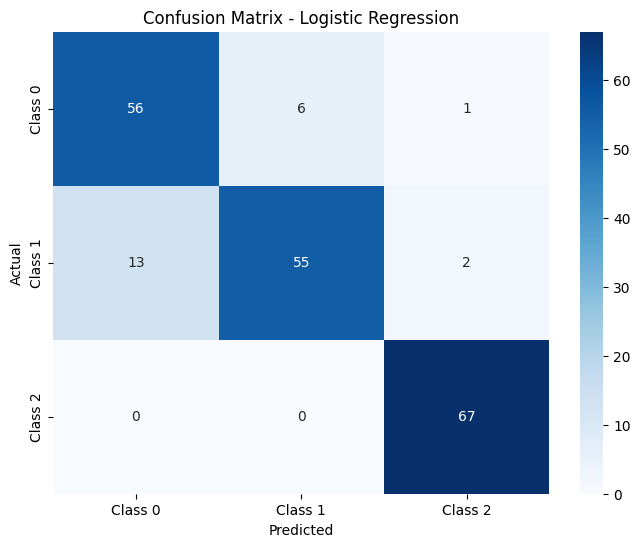

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=6, n_classes=3, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')

log_reg.fit(X_train, y_train)


y_pred_log_reg = log_reg.predict(X_test)


conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [63]:
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred_log_reg, output_dict=True)
df_report = pd.DataFrame(report_dict).transpose()


df_report


precision    recall  f1-score  support
0              0.811594  0.888889  0.848485    63.00
1              0.901639  0.785714  0.839695    70.00
2              0.957143  1.000000  0.978102    67.00
accuracy       0.890000  0.890000  0.890000     0.89
macro avg      0.890125  0.891534  0.888761   200.00
weighted avg   0.891869  0.890000  0.888830   200.00

In [64]:
df_report.to_csv("logistic_regression_report.csv")


#DecisionTree

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.95      0.47        63
           1       0.00      0.00      0.00        70
           2       0.17      0.01      0.03        67

    accuracy                           0.30       200
   macro avg       0.16      0.32      0.16       200
weighted avg       0.15      0.30      0.16       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



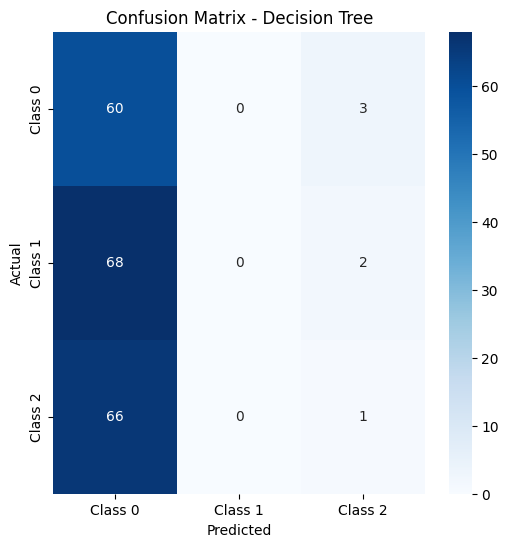

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تحويل جميع البيانات إلى نصوص
X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]

# تحويل النصوص إلى تمثيل عددي باستخدام TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# تدريب نموذج Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, y_train)

# التنبؤ بالنتائج
y_pred_dt = dt_model.predict(X_test_tfidf)

# طباعة تقرير التصنيف
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# رسم مصفوفة الارتباك
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [90]:
print(df.columns)


Index(['clean_text', 'category'], dtype='object')


In [85]:
print(df.head())


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [87]:
df.columns = df.columns.str.strip()


In [88]:
df = pd.read_csv("Twitter_Data.csv", encoding="utf-8")


In [91]:
df = pd.read_csv("Twitter_Data.csv", encoding="utf-8")


عدد القيم الفارغة في y_train بعد التقسيم: 0
Decision Tree Classification Report:
              precision    recall  f1-score   support

          -1       0.73      0.22      0.34      7152
           0       0.47      0.71      0.57     11067
           1       0.58      0.56      0.57     14375

    accuracy                           0.53     32594
   macro avg       0.59      0.49      0.49     32594
weighted avg       0.57      0.53      0.52     32594



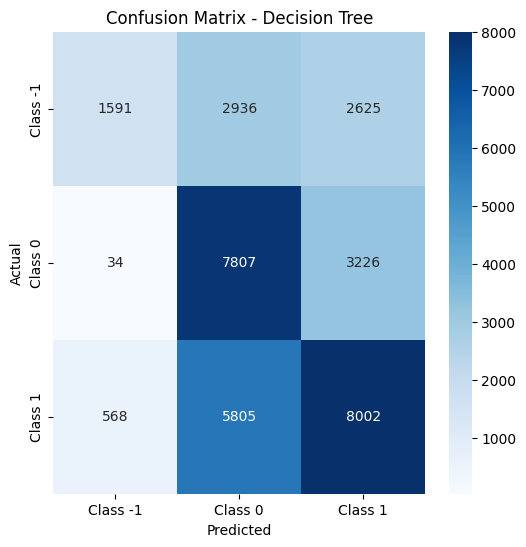

Random Forest Classification Report:
              precision    recall  f1-score   support

          -1       0.82      0.64      0.72      7152
           0       0.80      0.91      0.85     11067
           1       0.85      0.86      0.85     14375

    accuracy                           0.83     32594
   macro avg       0.83      0.80      0.81     32594
weighted avg       0.83      0.83      0.82     32594



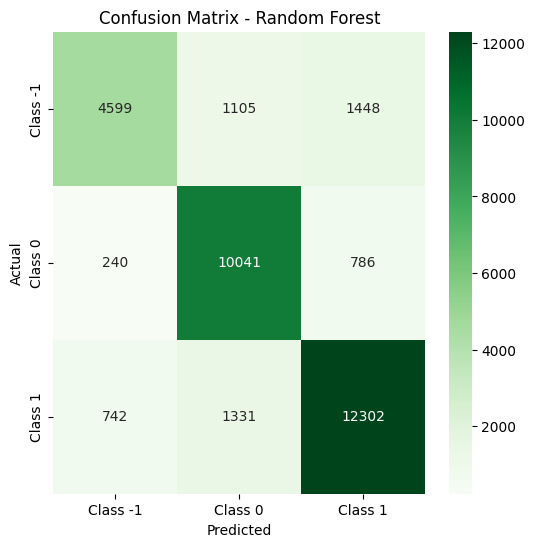

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


df = pd.read_csv("Twitter_Data.csv")


df = df.dropna(subset=["clean_text", "category"])
df["category"] = df["category"].astype(int)

X = df["clean_text"]
y = df["category"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"عدد القيم الفارغة في y_train بعد التقسيم: {y_train.isna().sum()}")

smote = SMOTE(random_state=42)
X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)


dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
dt_model.fit(X_train_tfidf, y_train)


y_pred_dt = dt_model.predict(X_test_tfidf)


print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class -1", "Class 0", "Class 1"],
            yticklabels=["Class -1", "Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens",
            xticklabels=["Class -1", "Class 0", "Class 1"],
            yticklabels=["Class -1", "Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


#KNeighbors

In [102]:
print(df.columns)


Index(['clean_text', 'category'], dtype='object')


In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import Normalizer


df = pd.read_csv("Twitter_Data.csv")

df = df.dropna(subset=["clean_text", "category"])
df["category"] = df["category"].astype(int)


X = df["clean_text"]
y = df["category"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

smote = SMOTE(random_state=42)
X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)


scaler = Normalizer()
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)


knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_model.fit(X_train_tfidf, y_train)

y_pred_knn = knn_model.predict(X_test_tfidf)


print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Purples",
            xticklabels=["Class -1", "Class 0", "Class 1"],
            yticklabels=["Class -1", "Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


KNN Classification Report:
              precision    recall  f1-score   support

          -1       0.77      0.14      0.24      7152
           0       0.37      0.98      0.54     11067
           1       0.94      0.13      0.23     14375

    accuracy                           0.42     32594
   macro avg       0.69      0.42      0.33     32594
weighted avg       0.71      0.42      0.34     32594



#AdaBoost

Decision Tree Classification Report:
              precision    recall  f1-score   support

        -1.0       0.73      0.22      0.34      7152
         0.0       0.47      0.71      0.57     11067
         1.0       0.58      0.56      0.57     14375

    accuracy                           0.53     32594
   macro avg       0.59      0.49      0.49     32594
weighted avg       0.57      0.53      0.52     32594



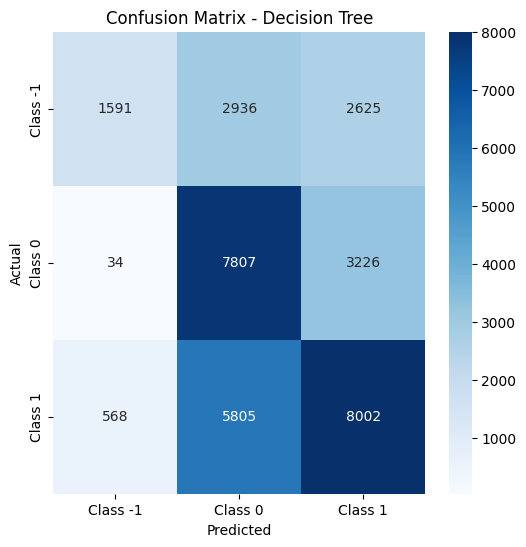

Random Forest Classification Report:
              precision    recall  f1-score   support

        -1.0       0.82      0.64      0.72      7152
         0.0       0.80      0.91      0.85     11067
         1.0       0.85      0.86      0.85     14375

    accuracy                           0.83     32594
   macro avg       0.83      0.80      0.81     32594
weighted avg       0.83      0.83      0.82     32594



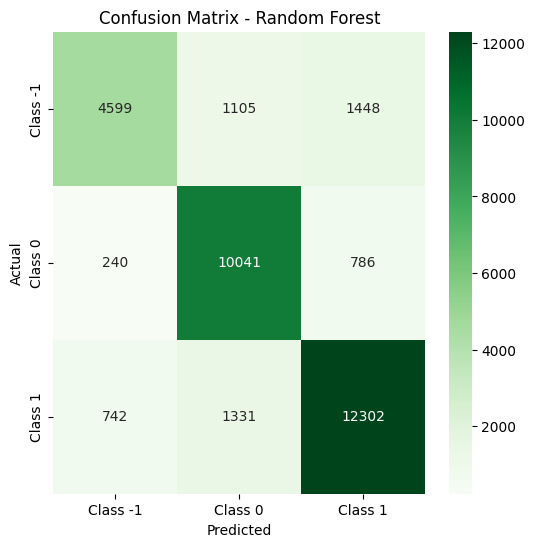

KNN Classification Report:
              precision    recall  f1-score   support

        -1.0       0.69      0.15      0.25      7152
         0.0       0.37      0.97      0.53     11067
         1.0       0.94      0.10      0.18     14375

    accuracy                           0.41     32594
   macro avg       0.67      0.41      0.32     32594
weighted avg       0.69      0.41      0.32     32594



AdaBoost Classification Report:
              precision    recall  f1-score   support

        -1.0       0.40      0.43      0.41      7152
         0.0       0.47      0.86      0.61     11067
         1.0       0.93      0.30      0.46     14375

    accuracy                           0.52     32594
   macro avg       0.60      0.53      0.49     32594
weighted avg       0.66      0.52      0.50     32594



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("Twitter_Data.csv")

# Drop missing values in 'clean_text' and 'category'
df = df.dropna(subset=["clean_text", "category"]).copy()

# Convert 'category' column to integer
df.loc[:, "category"] = df["category"].astype(int)

# Define features and target
X = df["clean_text"]
y = df["category"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)

# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
dt_model.fit(X_train_tfidf, y_train)
y_pred_dt = dt_model.predict(X_test_tfidf)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Class -1", "Class 0", "Class 1"],
            yticklabels=["Class -1", "Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens",
            xticklabels=["Class -1", "Class 0", "Class 1"],
            yticklabels=["Class -1", "Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Train K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)
y_pred_knn = knn_model.predict(X_test_tfidf)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Plot Confusion Matrix for KNN
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Class -1", "Class 0", "Class 1"],
            yticklabels=["Class -1", "Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

# Train AdaBoost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train_tfidf, y_train)
y_pred_adaboost = adaboost_model.predict(X_test_tfidf)
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

# Plot Confusion Matrix for AdaBoost
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt="d", cmap="Purples",
            xticklabels=["Class -1", "Class 0", "Class 1"],
            yticklabels=["Class -1", "Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.show()


#TESTING

In [4]:
from sklearn.ensemble import AdaBoostClassifier


ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ada_model.fit(X_train_tfidf, y_train)


y_pred_ada = ada_model.predict(X_test_tfidf)

print("Testing completed successfully ✅")


Testing completed successfully ✅


#SAVE

In [5]:
import joblib


joblib.dump(rf_model, "random_forest_model.pkl")


joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


#FLASK

In [7]:
!pip install flask-ngrok


In [10]:
!pip install pyngrok


In [18]:
!ngrok authtoken 2tQGq9QCOKD4Lt6YRXS9hz9Dhe0_358UYdGBZMHYba6giJbGs


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [24]:
!ngrok http 5000


Traceback (most recent call last):
  File "/usr/lib/python3.11/subprocess.py", line 1264, in wait
    return self._wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 2053, in _wait
    (pid, sts) = self._try_wait(0)
                 ^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/subprocess.py", line 2011, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/ngrok", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pyngrok/ngrok.py", line 617, in main
    run(sys.argv[1:])
  File "/usr/local/lib/python3.11/dist-packages/pyngrok/ngrok.py", line 605, in run
    process.run_process(pyngrok_config.ngrok_path, args)
  File "/usr/local/lib/python3.11/dist-packages/pyngrok/pro

In [25]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

rf_model = joblib.load("random_forest_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    text = data.get("text")
    if not text:
        return jsonify({"error": "No text provided"}), 400

    text_tfidf = vectorizer.transform([text])
    prediction = rf_model.predict(text_tfidf)[0]

    return jsonify({"prediction": int(prediction)})

if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [26]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok

In [42]:
from pyngrok import ngrok

ngrok.set_auth_token('2pFqEG0xMMWHfwUydtW6VMTWGHW_2dCdFVBa6NxvYmCUhmJZ2')
public_url = ngrok.connect(5000)
print(f"Public URL: {public_url}")


Public URL: NgrokTunnel: "https://e60e-34-125-10-253.ngrok-free.app" -> "http://localhost:5000"


In [43]:
from flask import Flask, request, render_template_string
from flask_ngrok import run_with_ngrok
from nltk.sentiment import SentimentIntensityAnalyzer

app = Flask(__name__)
run_with_ngrok(app)
sia = SentimentIntensityAnalyzer()

# HTML Template with CSS
html_template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Sentiment Analysis</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background-color: #007BFF;  /* Blue background */
            color: white;
            text-align: center;
            padding: 20px;
        }
        .container {
            background-color: white;
            color: black;
            border-radius: 10px;
            padding: 30px;
            margin-top: 20px;
            display: inline-block;
        }
        textarea {
            width: 80%;
            height: 100px;
            margin-top: 10px;
            padding: 10px;
            border-radius: 5px;
                    }
        button {
            background-color: #28a745;
            color: white;
            border: none;
            padding: 10px 20px;
            margin-top: 10px;
            border-radius: 5px;
            cursor: pointer;
        }
        button:hover {
            background-color: #218838;
        }
        h1, h2 {
            color: #FFFFFF;
        }
        ul {
            list-style-type: none;
            padding: 0;
        }
        li {
            background-color: #f8f9fa;
            margin: 5px;
            padding: 5px;
            border-radius: 5px;
        }
    </style>
</head>
<body>
    <h1>Sentiment Analysis</h1>
    <div class="container">
        <form action="/analyze" method="POST">
            <textarea name="text" placeholder="Enter your text here..."></textarea><br>
            <button type="submit">Analyze</button>
        </form>

        {% if text %}
        <h2>Input Text:</h2>
        <p>{{ text }}</p>
        <h2>Sentiment Scores:</h2>
        <ul>
            <li><strong>Positive:</strong> {{ sentiment['pos'] }}</li>
            <li><strong>Neutral:</strong> {{ sentiment['neu'] }}</li>
            <li><strong>Negative:</strong> {{ sentiment['neg'] }}</li>
            <li><strong>Compound:</strong> {{ sentiment['compound'] }}</li>
        </ul>
        {% endif %}
    </div>
</body>
</html>
"""

@app.route('/')
def home():
    return render_template_string(html_template)

@app.route('/analyze', methods=['POST'])
def analyze():
    text = request.form['text']
    sentiment = sia.polarity_scores(text)
    return render_template_string(html_template, text=text, sentiment=sentiment)

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://e60e-34-125-10-253.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [23/Feb/2025 04:56:23] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Feb/2025 04:56:24] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Feb/2025 04:56:38] "POST /analyze HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Feb/2025 04:56:54] "POST /analyze HTTP/1.1" 200 -


 ** T H E    E N D **